<a href="https://colab.research.google.com/github/govardhanspace/ML-DL-Projects/blob/main/Predicting_Insurance_Charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. LINEAR REGRESSION


Linear regression is a method for finding the straight line that best fits a set of data points, so you can use it to make predictions. For example, if you have data on the size of houses and their prices, linear regression helps you draw a line through the data to predict house prices based on their size.

## Importing Essentials

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [ ]:
df = pd.read_csv('https://github.com/govardhanspace/Datasets/raw/main/Medical%20Insurance%20Cost.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA - Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

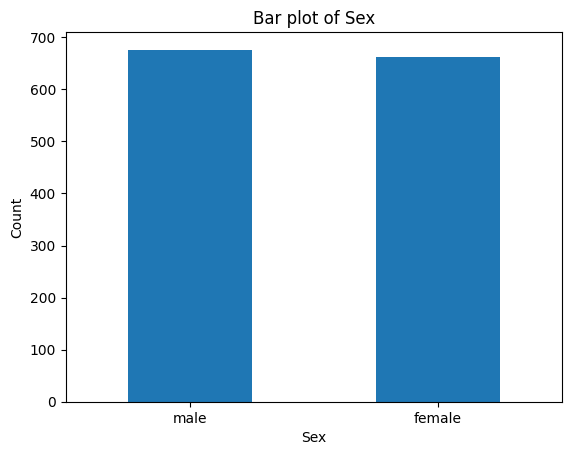

In [ ]:
import matplotlib.pyplot as plt
df.sex.value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar plot of Sex')
plt.xticks(rotation=0)
plt.show()


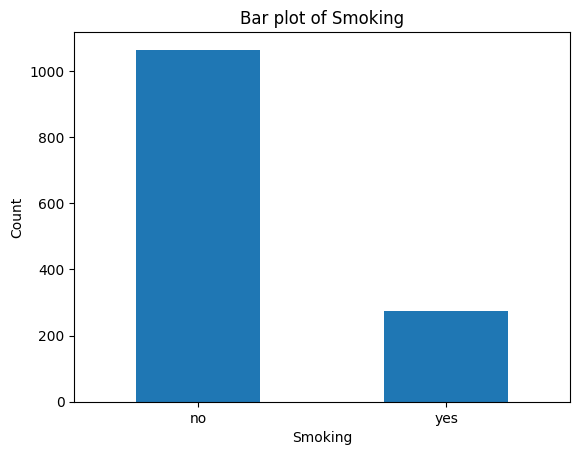

In [ ]:
import matplotlib.pyplot as plt
df.smoker.value_counts().plot(kind='bar')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Bar plot of Smoking')
plt.xticks(rotation=0)
plt.show()


There are a lot of non smokers in the dataset compared to smokers.

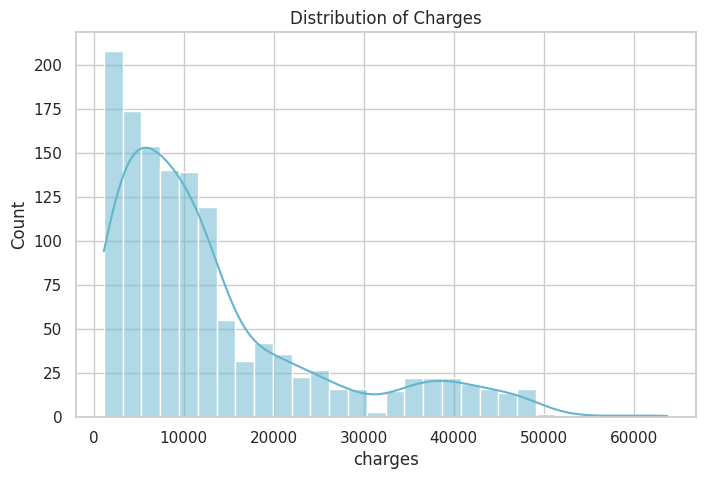

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(8, 5))

# Use histplot instead of distplot
sns.histplot(df['charges'], kde=True, color='c', ax=ax)

ax.set_title('Distribution of Charges')
plt.show()

Keypoints from interpreting the distribution of charges:
* **Central Tendency:** Most data points are clustered towards the lower end of the
charge spectrum.
* **Spread:** There is a wide range of charges, extending up to around 60,000, but the frequency of such high charges is very low.
* **Skewness:** The distribution is **positively skewed** (right-skewed), indicating that a significant number of outliers are on the higher end of the charge scale.


---


In summary, the histogram shows that while most charges are relatively low, there is a substantial variation with some instances of very high charges, resulting in a **right-skewed distribution**.

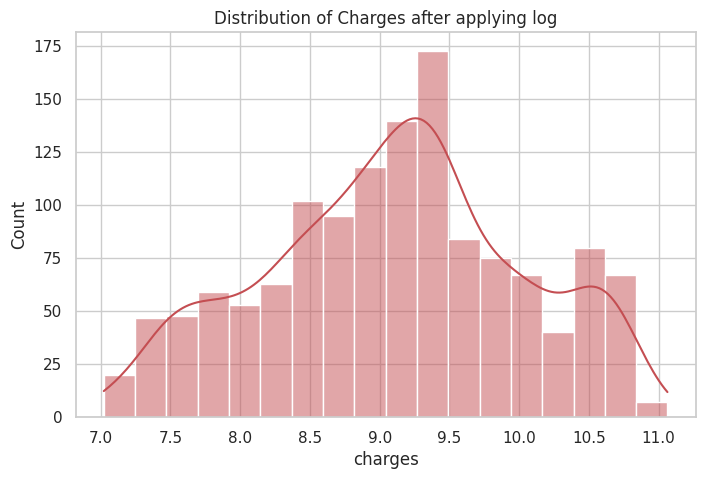

In [ ]:
# Applying a natural log transformation to the right skewed data

sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.histplot(np.log(df['charges']), kde=True, color='r', ax=ax)

ax.set_title('Distribution of Charges after applying log')
plt.show()

Applying a natural log transformation to right-skewed data can help to normalize the data, making it more symmetric and closer to a normal distribution. Here's what typically happens when you apply a natural log to right-skewed data:

1. Reduction of Skewness: The natural log transformation compresses the range of the data, reducing the impact of extreme values (high charges in this case) and thus reducing skewness.

2. Stabilization of Variance: Log transformation can help stabilize the variance across different levels of the data. This means the spread of the data becomes more uniform.

3. Normalization: Although it doesn't always make the data perfectly normal, the log transformation often makes the data more normally distributed, which can be beneficial for many statistical analyses and models that assume normality.

In [ ]:
charges_by_gender = df['charges'].groupby(df.sex).sum()
print(charges_by_gender)

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64


In [ ]:
charges_by_gender = df['charges'].groupby(df.sex).sum().sort_values(ascending= True).reset_index()
print(charges_by_gender)

      sex       charges
0  female  8.321061e+06
1    male  9.434764e+06


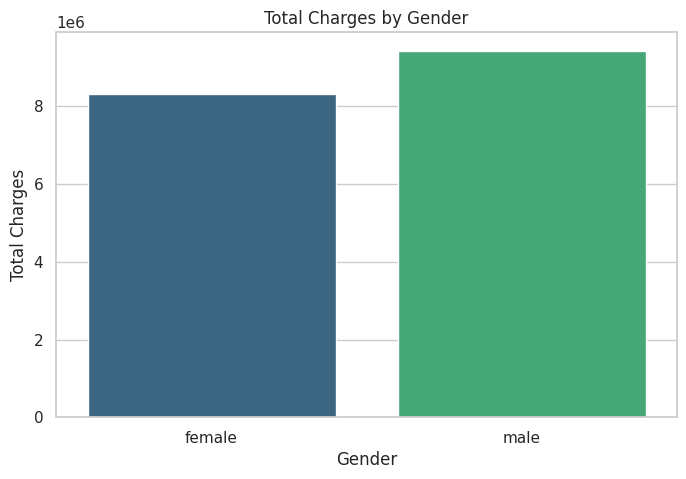

In [ ]:
# Let's look at charges with respect to gender

import warnings
warnings.filterwarnings('ignore')

charges_by_gender = df['charges'].groupby(df.sex).sum().sort_values(ascending= True).reset_index()

# Set the style for the plot
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='charges', data=charges_by_gender, palette='viridis')

# Add title and labels
plt.title('Total Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Charges')

# Show the plot
plt.show()

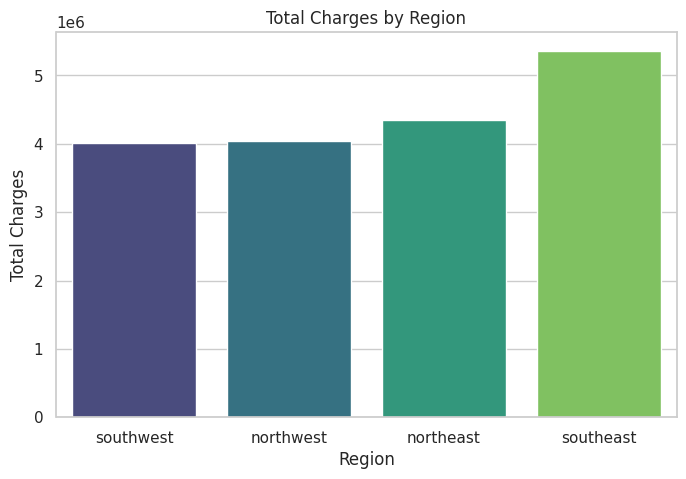

In [ ]:
# Let's look at charges with respect to regions

import warnings
warnings.filterwarnings('ignore')

charges_by_regions = df['charges'].groupby(df.regions).sum().sort_values(ascending= True).reset_index()

# Set the style for the plot
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='charges', data=charges_by_regions, palette='viridis')

# Add title and labels
plt.title('Total Charges by Region')
plt.xlabel('Region')
plt.ylabel('Total Charges')

# Show the plot
plt.show()

People from southeast having more charges than people from other regions. Let's look at the number of smokers in each region to see if there's any corelation between this.

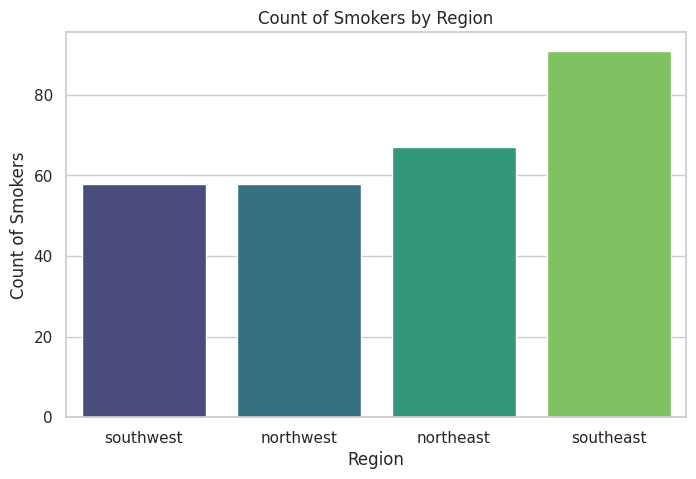

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Filter the DataFrame to include only smokers
smokers_df = df[df['smoker'] == 'yes']

# Calculate the count of smokers by region and sort in ascending order
smokers_by_region = smokers_df['region'].value_counts().sort_values().index

# Set the style for the plot
sns.set(style='whitegrid')

# Create the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=smokers_df, palette='viridis', order= smokers_by_region)

# Add title and labels
plt.title('Count of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count of Smokers')

# Show the plot
plt.show()

Yes, so as we can see that people in southeast are more likely to be smokers.

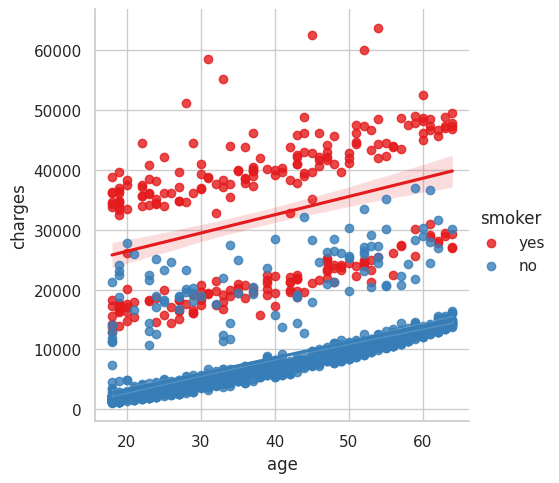

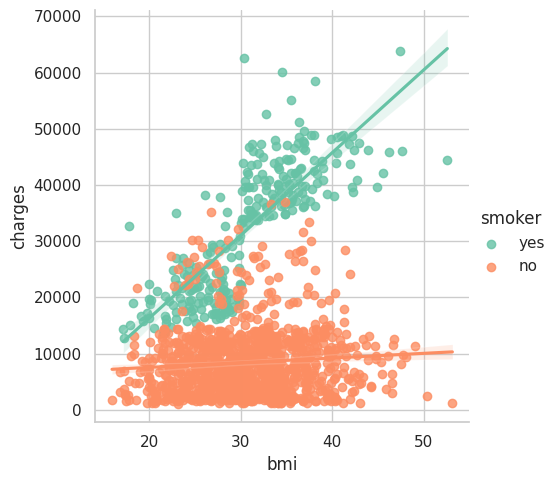

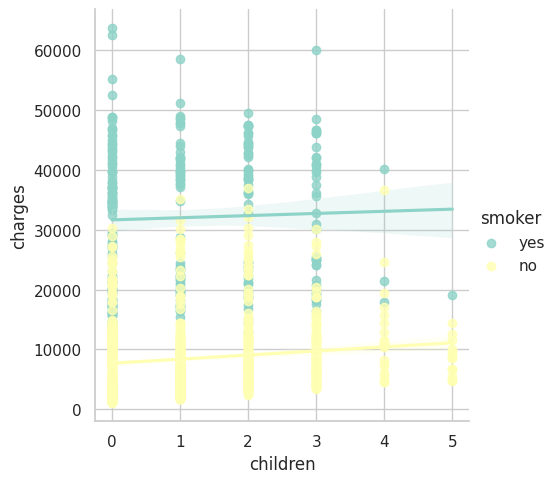

In [ ]:
# Now let's analyze the medical charges by age, bmi and children according to the smoking factor
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less

## Encoding

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.sex.drop_duplicates())
df.sex = encoder.transform(df.sex)
encoder.fit(df.smoker.drop_duplicates())
df.smoker = encoder.transform(df.smoker)
encoder.fit(df.region.drop_duplicates())
df.region = encoder.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

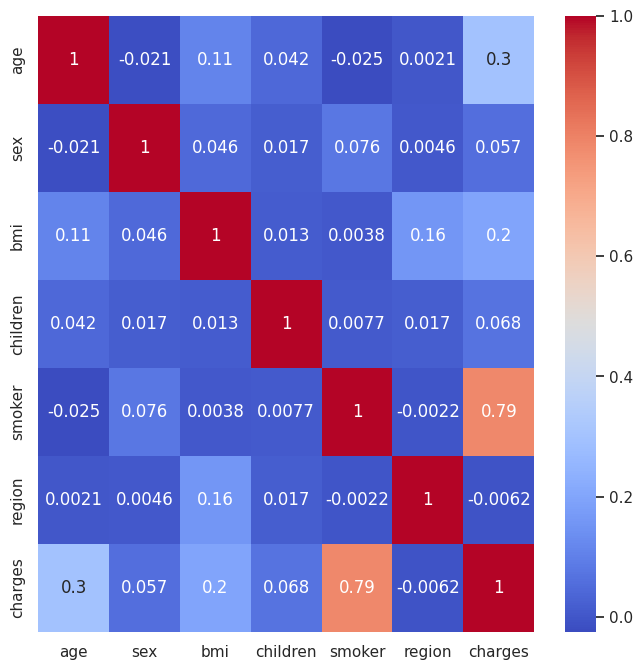

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The above given plot is a **correlation heatmap**.

`Correlation measures the relationship between two variables and can range from -1 to 1.` Here's an interpretation of the heatmap:

**Key Takeaways**

**Strongest Correlation:** The strongest correlation is between smoking status and charges (0.79), indicating that being a smoker is strongly associated with higher charges.

**Moderate Correlations:** Age also shows a moderate correlation with charges (0.3), implying that older individuals tend to have higher charges.

**Weak Correlations:** BMI has a weak positive correlation with charges (0.2), and the number of children has a very weak correlation with charges (0.068).

**Negligible Correlations:** Sex and region have negligible correlations with charges, suggesting these factors do not significantly affect charges.

## Model Training and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
x = df.drop(['charges'], axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred),'\n')
print('R2 Score:', r2_score(y_test, y_pred), '\n')
print(f"Intercept: {linear_reg.intercept_} \n")
linear_reg_coef = pd.DataFrame(linear_reg.coef_,
                               x.columns,
                               columns=['coef'])\
                               .sort_values(by='coef', ascending=False)
print(linear_reg_coef)

Mean Squared Error: 29581426.90515103 

R2 Score: 0.7814888546122385 

Intercept: -11807.356708180907 

                  coef
smoker    23677.314166
children    496.079792
bmi         338.494850
age         256.150258
sex         -33.643210
region     -439.972508


## Undertsanding the metrics.


### Mean Squared Error (MSE)

In simple terms, MSE tells you how far, on average, your model's predictions are from the actual values. A lower MSE means your predictions are closer to the actual values, indicating a better model.

To know more about MSE and R² watch this video -- https://www.youtube.com/watch?v=bMccdk8EdGo

### R² Score
The coefficient of determination (R²) measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.

The lowest possible value of R² is 0 and the highest possible value is 1. Put simply, the better a model is at making predictions, the closer its R² will be to 1.

To know more about R² check this link https://www.scribbr.com/statistics/coefficient-of-determination/#:~:text=The%20coefficient%20of%20determination%20(R%C2%B2)%20is%20a%20number%20between%200,predicted%20by%20the%20statistical%20model.

### Intercept

An intercept represents a baseline or starting point for the dependent variable, if the independent variables are set to zero. The intercept serves as the starting point for evaluating the effects of the independent variables on the dependent variable. It reflects the portion of the dependent variable that is not influenced by the independent variables included in the model. It helps quantify the impact of changes in the independent variables from this baseline value.

For example, in a medical cost prediction model, the intercept might represent the expected charges when all other factors, such as age, BMI, number of children, smoking status, and region, are at zero. This baseline value provides a reference point from which the impact of each of these factors on medical charges can be assessed. It helps in understanding the portion of the charges that are not explained by the variables in the model.

In this context, the intercept could represent the base cost of healthcare that is independent of a patient's demographics or health-related behaviors.

For more info check this site
https://www.dataversity.net/understanding-linear-regression-intercepts-in-plain-language/#:~:text=The%20intercept%20or%20constant%20in,variables%2C%20and%20Xs%20are%20zero.

### Feature Importance

In [ ]:
coefficients = linear_reg.coef_

feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
print(feature_importance)

    Feature   Coefficient  Absolute Coefficient
4    smoker  23677.314166          23677.314166
3  children    496.079792            496.079792
5    region   -439.972508            439.972508
2       bmi    338.494850            338.494850
0       age    256.150258            256.150258
1       sex    -33.643210             33.643210


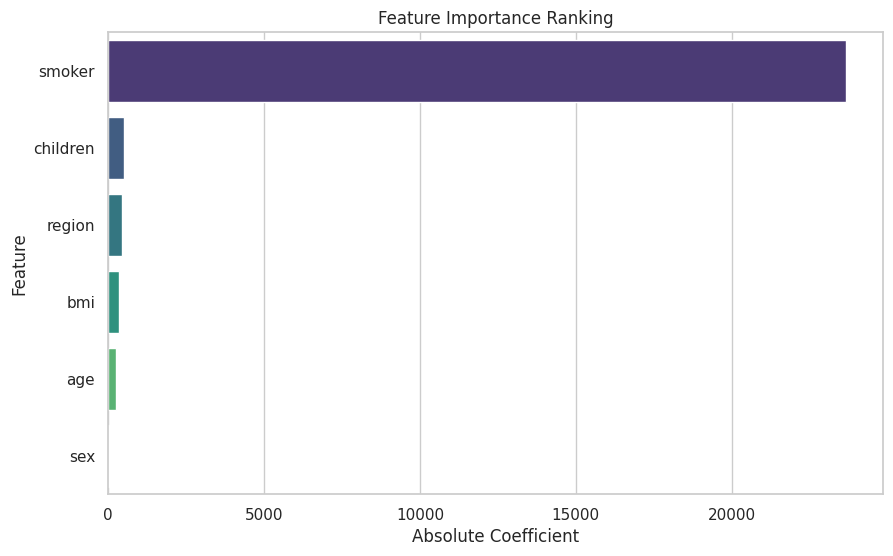

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', palette='viridis', data=feature_importance)
plt.title('Feature Importance Ranking')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()